# Which plants are better for bees: native or non-native?

Description of the data

You have assembled information on the plants and bees research in a file called plants_and_bees.csv. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

Column	Description
sample_id	The ID number of the sample taken.
species_num	The number of different bee species in the sample.
date	Date the sample was taken.
season	Season during sample collection ("early.season" or "late.season").
site	Name of collection site.
native_or_non	Whether the sample was from a native or non-native plant.
sampling	The sampling method.
plant_species	The name of the plant species the sample was taken from. None indicates the sample was taken from the air.
time	The time the sample was taken.
bee_species	The bee species in the sample.
sex	The gender of the bee species.
specialized_on	The plant genus the bee species preferred.
parasitic	Whether or not the bee is parasitic (0:no, 1:yes).
nesting	The bees nesting method.
status	The status of the bee species.
nonnative_bee	Whether the bee species is native or not (0:no, 1:yes).

In [7]:
import pandas as pd
data = pd.read_csv("/Users/..../Downloads/bee_native.csv")
data

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


In [8]:
# replacing None in plant_species with air_sample
data["plant_species"] = data["plant_species"].replace("None", "air_sample")

# filter the nonnative_bee column for null values
clean_data = data[data['nonnative_bee'].notnull()]

# native bee prefering plants frequency
native_pref=clean_data[clean_data['nonnative_bee']==0]['plant_species'].value_counts()

# frequency of plants prefered by non native bees
nonnative_pref = clean_data[clean_data['nonnative_bee']==1]['plant_species'].value_counts()

#Top three plants for native bees
top_three = native_pref.head(3)
print('The top three plant species recommended for native bee species:')
print(top_three)

The top three plant species recommended for native bee species:
air_sample              762
Leucanthemum vulgare    102
Rudbeckia hirta          51
Name: plant_species, dtype: int64


In [9]:
#the plants preferred by native bee species are given below
native_pref

air_sample                  762
Leucanthemum vulgare        102
Rudbeckia hirta              51
Daucus carota                31
Cichorium intybus            25
Chamaecrista fasciculata     23
Trifolium pratense           21
Helenium flexuosum           19
Melilotus officinalis        16
Penstemon digitalis          15
Asclepias tuberosa           13
Rudbeckia triloba            12
Coronilla varia              12
Monarda punctata             10
Cosmos bipinnatus             9
Trifolium repens              6
Agastache foeniculum          5
Lobularia maritima            5
Pycnanthemum tenuifolium      4
Lotus corniculatus            3
Tradescantia virginiana       3
Viola cornuta                 3
Origanum vulgare              2
Trifolium incarnatum          2
Name: plant_species, dtype: int64

In [10]:
# the plants preferred by nonnative bee species are given below:
nonnative_pref

air_sample              33
Daucus carota            1
Trifolium incarnatum     1
Name: plant_species, dtype: int64

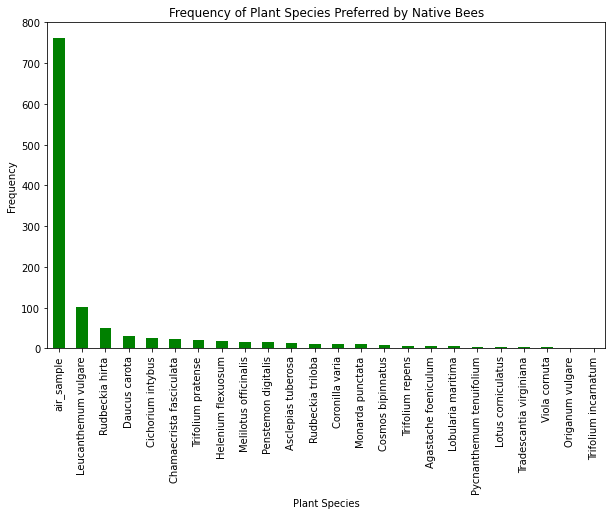

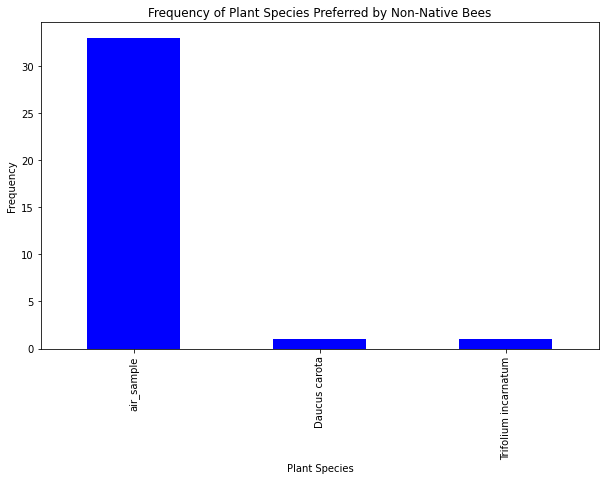

In [11]:
import matplotlib.pyplot as plt

# Plot for native bee preferred plants
plt.figure(figsize=(10, 6))
native_pref.plot(kind='bar', color='green')
plt.title("Frequency of Plant Species Preferred by Native Bees")
plt.xlabel("Plant Species")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

# Plot for non-native bee preferred plants
plt.figure(figsize=(10, 6))
nonnative_pref.plot(kind='bar', color='blue')
plt.title("Frequency of Plant Species Preferred by Non-Native Bees")
plt.xlabel("Plant Species")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

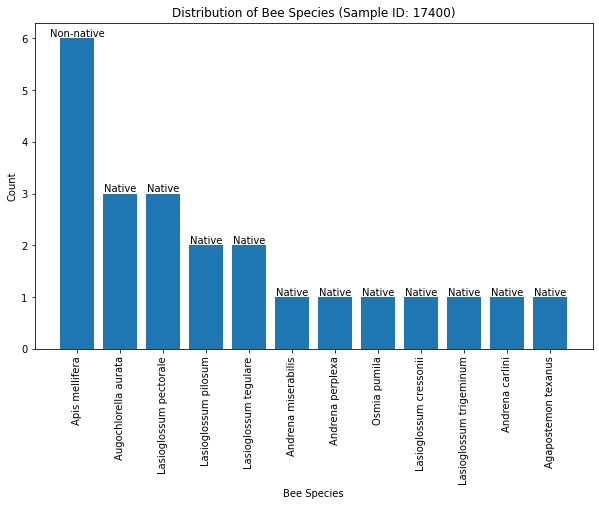

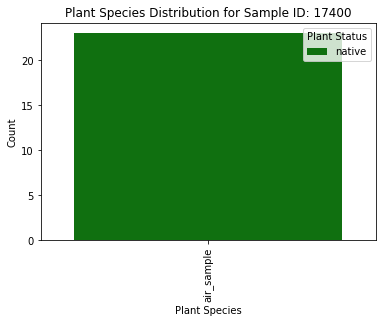

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sample_id=17400

# Filter the data for the selected sample ID
sample_data = data[data["sample_id"] == 17400]

# Count the occurrences of bee and plant species
bee_counts = sample_data["bee_species"].value_counts()
plant_counts = sample_data["plant_species"].value_counts()
bee_status = sample_data.groupby("bee_species")["nonnative_bee"].first()


# Create a bar plot for bee species
plt.figure(figsize=(10, 6))
plt.bar(bee_counts.index, bee_counts.values)
plt.xlabel("Bee Species")
plt.ylabel("Count")
plt.title("Distribution of Bee Species (Sample ID: {})".format(sample_id))
plt.xticks(rotation=90)

# Add native/non-native status labels
for i, species in enumerate(bee_counts.index):
    status = "Native" if bee_status[species] == 0 else "Non-native"
    plt.text(i, bee_counts.values[i], status, ha="center", va="bottom")

plt.show()



# Set up the color palette for native and non-native plant species
color_palette = {"native": "green", "non-native": "red"}

# Create the plot using seaborn
sns.countplot(x="plant_species", hue="native_or_non", data=sample_data, palette=color_palette)

# Customize the plot
plt.title(f"Plant Species Distribution for Sample ID: {sample_id}")
plt.xlabel("Plant Species")
plt.ylabel("Count")
plt.legend(title="Plant Status")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

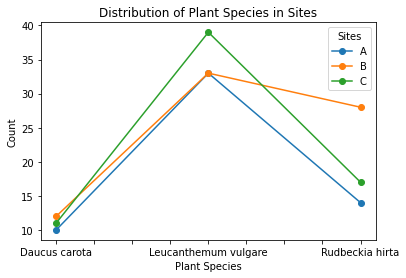

In [13]:
# Define the three plant species of interest
plant_species = ["Leucanthemum vulgare", "Rudbeckia hirta", "Daucus carota"]

# Define the three sites of interest
sites = ["A", "B", "C"]

# Filter the data for the specified plant species and sites
filtered_data = data[data["plant_species"].isin(plant_species) & data["site"].isin(sites)]

# Group the filtered data by plant species and site and count the occurrences
distribution = filtered_data.groupby(["plant_species", "site"]).size().unstack(fill_value=0)

# Plot the distribution as a bar chart
distribution.plot(kind="line", marker="o")

# Customize the plot
plt.title("Distribution of Plant Species in Sites")
plt.xlabel("Plant Species")
plt.ylabel("Count")
plt.legend(title="Sites")

# Display the chart
plt.show()


In [14]:
# Count the non-native bee species
nonnative_bee_counts = data["nonnative_bee"].value_counts()

# Extract the count of non-native bees
nonnative_count = nonnative_bee_counts[1] if 1 in nonnative_bee_counts else 0
# Extract the count of native bees
native_count = nonnative_bee_counts[0] if 0 in nonnative_bee_counts else 0

# Print the count of non-native and native bees 
print("Total number of non-native bee species:", nonnative_count)

print("Total number of native bee species:", native_count)

Total number of non-native bee species: 35
Total number of native bee species: 1154


In [15]:
# Group the data by plant species and retrieve the unique native/non-native values
plant_native_status = data.groupby("plant_species")["native_or_non"].unique()

# Iterate over each bee species and print its native/non-native status
for plant_species, status in plant_native_status.items():
    if 'non-native' in status:
        print(f"Plant species '{plant_species}' is non-native.")
    else:
        print(f"Plant species '{plant_species}' is native.")

Plant species 'Agastache foeniculum' is non-native.
Plant species 'Asclepias tuberosa' is native.
Plant species 'Chamaecrista fasciculata' is native.
Plant species 'Cichorium intybus' is non-native.
Plant species 'Coronilla varia' is non-native.
Plant species 'Cosmos bipinnatus' is non-native.
Plant species 'Daucus carota' is non-native.
Plant species 'Helenium flexuosum' is native.
Plant species 'Leucanthemum vulgare' is non-native.
Plant species 'Lobularia maritima' is non-native.
Plant species 'Lotus corniculatus' is non-native.
Plant species 'Melilotus officinalis' is non-native.
Plant species 'Monarda punctata' is native.
Plant species 'Origanum vulgare' is non-native.
Plant species 'Penstemon digitalis' is native.
Plant species 'Pycnanthemum tenuifolium' is native.
Plant species 'Rudbeckia hirta' is native.
Plant species 'Rudbeckia triloba' is native.
Plant species 'Tradescantia virginiana' is native.
Plant species 'Trifolium incarnatum' is non-native.
Plant species 'Trifolium pr

In [16]:
# Group the data by bee species and retrieve the unique native/non-native values
native_status = data.groupby("bee_species")["nonnative_bee"].unique()

# Iterate over each bee species and print its native/non-native status
for bee_species, status in native_status.items():
    if 1 in status:
        print(f"Bee species '{bee_species}' is non-native.")
    else:
        print(f"Bee species '{bee_species}' is native.")

Bee species 'Agapostemon sericeus' is native.
Bee species 'Agapostemon splendens' is native.
Bee species 'Agapostemon texanus' is native.
Bee species 'Agapostemon virescens' is native.
Bee species 'Andrena (Trachandrena)' is native.
Bee species 'Andrena atlantica' is native.
Bee species 'Andrena banksi' is native.
Bee species 'Andrena barbara' is native.
Bee species 'Andrena carlini' is native.
Bee species 'Andrena macra' is native.
Bee species 'Andrena miserabilis' is native.
Bee species 'Andrena nasonii' is native.
Bee species 'Andrena perplexa' is native.
Bee species 'Andrena wilkella' is native.
Bee species 'Anthidiellum notatum' is native.
Bee species 'Anthidium manicatum' is non-native.
Bee species 'Apis mellifera' is non-native.
Bee species 'Augochlora pura' is native.
Bee species 'Augochlorella aurata' is native.
Bee species 'Augochloropsis metallica_fulgida' is native.
Bee species 'Augochloropsis metallica_metallica' is native.
Bee species 'Bombus bimaculatus' is native.
Bee s

In our original dataset we were given 1250 observations. These observations gave us information on 16 variables of which some were very important for our analysis, such as whether a bee species is native or nonnative, name of bee species, plant species name and whether it is native or nonnative.

First, we performed exploratory data analysis and removed any null value present in the nonnative_bee column. This clean dataset is then used for further analysis. Our analysis showed there were 90 unique native bee species, and 3 unique nonnative bee species present in our dataset. Hence, we saw a prevalence of native bee species in our bee population, which is expected to be true. This is likely because native bees have evolved to be adapted to the specific flowers and pollen of native plants, and to the native weather. Non-native bees, on the other hand, may not be as well-adapted to native plants, or the native weather.

Out of the 3 non-native bee species Apis mellifera is prevalent. The other two are: Anthidium manicatum and Osmia taurus. A closer look at the analysis revealed that the most favorite plant species among non-native bee species are air sample followed by Trifolium incarnatum (non-native) and Daucus carota (non-native). The air sample consisted of 54.3% of native plant species and the rest as nonnative plant species. The two plant species mentioned above are native to the European region. So, this shows that non-native bee species prefer native plants over non-native plants. Also, it gives rise to the hypothesis that weather may be the other factor in the adapting process for the nonnative bee species.

On the other hand, a few of the plant species that are popular among native bee species are: air sample (48.6% is native species and 51.4% is non-native), Leucanthemum vulgare (non-native), Rudbeckia hirta (native) and Daucus carota (non-native). It is interesting that Daucus carota which is considered as an invasive species in the USA is among the top favorites of the native bees. We see prevalence of non-native plant species among the top favorites for native bee species. After digging deeper, we find that only 37.5% of the plants listed in our data are native species, so the rest 62.5% are nonnative plant species.

This whole analysis nullifies the hypothesis that non-native bees are having issues adapting to the native plants available here. Native bees prefer nonnative plant species compared to the nonnative bee species. That solidifies our other hypothesis that weather may be impacting the nonnative bee species.

Finally, we looked at the site distribution of the top three plant species popular among native bees. It was evident that Leucanthemum vulgare prefers site C, followed by equal preference for site A and B. Rudbeckia hirta prefers site B, followed by C and A. Daucus carota has a little more preference for B followed by C and A.

Conclusion: Based on our analysis we can use site C or site B for creating our environment. We can use combination of Leucanthemum vulgare (non-native), Rudbeckia hirta (native) and Daucus carota (non-native) plant species to optimize the environment for pollinator native bees.